# SpotAnalyzer - Demo

Regions:
* A: GaAs, ZB
* B: GaAsSb
* C: GaAs, WZ
* D: Pure GaAs, amorphous

![image.png](attachments/nw_overview.png)

## Setup

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import hyperspy.api as hs
import uts    # Import the uts.py module

In [2]:
# Define function to get the thickness from a signal
def get_thick(s):
    reg = uts.get_region(s)
    
    if reg in ['A', 'B', 'C']:    # A, B and C are at the nanowire
        width = 104e-9    # in meters
        return uts.get_thickness(s, width, params['zone_tilt'], hexagonal=True)
    
    if reg in ['D']:    # D is at the Ga catalyst droplet
        return 108e-9

In [3]:
# Define a dictionary `params`, which contains all information necessary to create a SpotAnalyzer object
params = {
    'id': 'spot_data_1',    # Unique id for the dataset
    'folder': r'.\data_spot_analyzer',    # Folder containing the EDX data
    'region_names': {    # Give each region a name. These names can be used when plotting data.
        'A': 'ZB',
        'B': 'insert',
        'C': 'WZ',
        'D': 'amorphous'
    },
    'all_elements': ['Ga', 'As', 'Sb', 'Cu', 'C', 'O', 'Si', 'Fe'],   # Specify all elements which are present in the samples. Useful when plotting spectra.
    'spectrum_calibration_scale': 0.010034,    # Optional. Tune the scale of the spectrum.
    'spectrum_calibration_offset': -0.2105,    # Optional. Tune the offset of the spectrum.
    'beam_current': 'from_measurement_files',    # Specify that you want to obtain beam currents from .dm3 measurement files. Alternatively, supply beam currents as a dictionary in the format {'A1': 1.15, 'A2': 1.18, ...}.
    'counts_per_electron': 1.47,    # Conversion efficiency of the CCD
    'beam_current_strategy': 'interp_fill',    # Set the beam current of each spectrum by interpolation the beam current measurements. Other options are `regr`, `mean` and `middle`.
    'intensity': 'model_fitting',    # Either `model_fitting` or `window_method`. Specifies how the X-ray intensities should be retrieved from the EDX spectra
    'mod_elements': {    # If model fitting: Specify which elements should be model fitted.
        'A': ['As', 'Cu', 'Ga'],
        'B': ['As', 'Cu', 'Ga'],
        'C': ['As', 'Cu', 'Ga'],
        'D': ['Cu', 'Ga']
    },
    'mod_lim': {    # If model fitting: Specify the energy range (in keV) which is used for model fitting.
        'A': slice(2.5, 20.0),
        'B': slice(5.0, 20.0),
        'C': slice(2.5, 20.0),
        'D': slice(2.5, 20.0),
    },
    'bw_pos': {'Ga_Ka': [4, 3], 'As_Ka': [3.5, 2.5]},    # If window method: Specify the background window positions of each peak, as multiples of the FWHM of the peak.
    'iw_width': 1.2,    # Specify the width of the integration window
    'composition': {    # Sample composition at each region, in at%. Internally, the compositions are converted to wt%.
        'A': {'Ga': 0.5, 'As': 0.5},
        'C': {'Ga': 0.5, 'As': 0.5},
        'D': {'Ga': 1}
    },
    'zone_tilt': -6.41,    # Stage tilt (in degrees) at which the nanowire is orthogonal to the electron beam (110 zone axis). Used for thickness correction.
    'zone_axes': {-6.41: '110', 23.99: '112'},    # Specify which zone axes are at which stage tilts (in degrees)
    'thickness': get_thick,    # Function for retrieving thickness from each signal
    'density': { # in kg/m^3
        'A': 5317.6,    # Density of region A, which is GaAs
        'C': 5317.6,    # Density of region C, which is GaAs
        'D': hs.material.elements.Ga.Physical_properties.density_gcm3 * 1e3    # Density of region D, which is pure Ga
    },
    'regions': ['A', 'C', 'D'],    # Regions to find zeta-factors from
    'xray_lines': ['Ga_Ka', 'As_Ka'],    # X-ray lines to find zeta-factors from
    'exclude': ['1', '5-1']    # Exclude individual points from the dataset
}

In [4]:
# Create the SpotAnalyzer object
a = uts.SpotAnalyzer(params)

Loading model fitting results from cache


## Analyzing the data

The signals as stored in the `signals` attribute of the SpotAnalyzer class. The current dataset contains 56 single spectra.

In [5]:
a.signals

[<EDSTEMSpectrum, title: A1, dimensions: (|2048)>,
 <EDSTEMSpectrum, title: B1, dimensions: (|2048)>,
 <EDSTEMSpectrum, title: C1, dimensions: (|2048)>,
 <EDSTEMSpectrum, title: D1, dimensions: (|2048)>,
 <EDSTEMSpectrum, title: A2, dimensions: (|2048)>,
 <EDSTEMSpectrum, title: B2, dimensions: (|2048)>,
 <EDSTEMSpectrum, title: C2, dimensions: (|2048)>,
 <EDSTEMSpectrum, title: D2, dimensions: (|2048)>,
 <EDSTEMSpectrum, title: A3, dimensions: (|2048)>,
 <EDSTEMSpectrum, title: B3, dimensions: (|2048)>,
 <EDSTEMSpectrum, title: C3, dimensions: (|2048)>,
 <EDSTEMSpectrum, title: D3, dimensions: (|2048)>,
 <EDSTEMSpectrum, title: A4, dimensions: (|2048)>,
 <EDSTEMSpectrum, title: B4, dimensions: (|2048)>,
 <EDSTEMSpectrum, title: C4, dimensions: (|2048)>,
 <EDSTEMSpectrum, title: D4, dimensions: (|2048)>,
 <EDSTEMSpectrum, title: A5, dimensions: (|2048)>,
 <EDSTEMSpectrum, title: B5, dimensions: (|2048)>,
 <EDSTEMSpectrum, title: C5, dimensions: (|2048)>,
 <EDSTEMSpectrum, title: D5, di

## Plot tilt series

Plot a tilt series only containing the `Ga_Ka` points

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25938a1de10>)

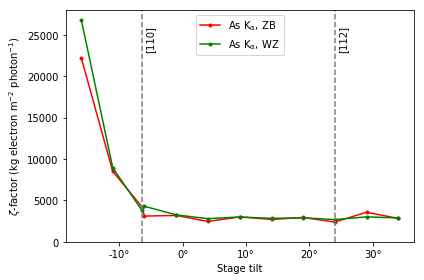

In [6]:
a.plot_tilt_series(xray_lines=['As_Ka'])

Plot a tilt series at a limited region, with labeled spots and with deviation

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25938aad9e8>)

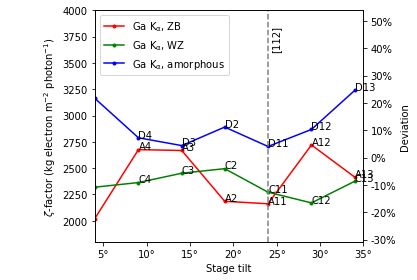

In [7]:
a.plot_tilt_series(xray_lines=['Ga_Ka'], annotate='all', ann_off=0, xmin=4, xmax=35, ymin=1800, ymax=4000, ref=2600)

Create a clone object to see the effect of beam current correction

In [8]:
args = {'xmin': -5, 'ymin': 2000, 'ymax': 5500, 'annotate': 'single', 'avg': 'xray_lines', 'color': None, 'ann_id': 1, 'ann_off': -0.06}    # It is possible to specify function arguments as a dictionary

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25938b83e48>)

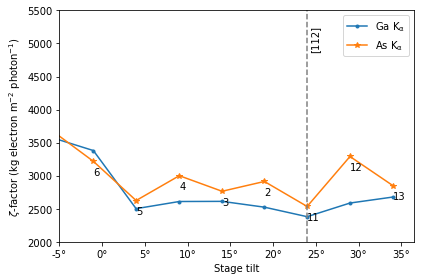

In [9]:
# Case 1: Account for differences in beam current (this is done by default)
a.plot_tilt_series(**args)

Loading model fitting results from cache


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2593f734748>)

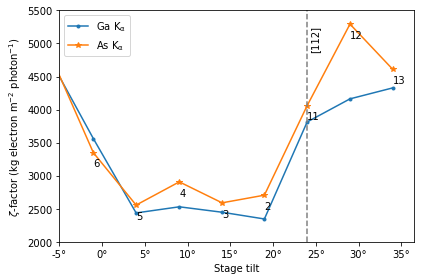

In [10]:
# Case 2: Set the beam current to be constant
b = a.update(beam_current=0.057)
b.plot_tilt_series(**args)

## Analyze zeta-factors

In [11]:
indices=['5-2', '4', '3', '2', '11', '12', '13'] # These are the indices from which zeta-factors are determined. See the figures above for the labeling of spots

Plot zeta_factors for each region

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2593f9a1400>)

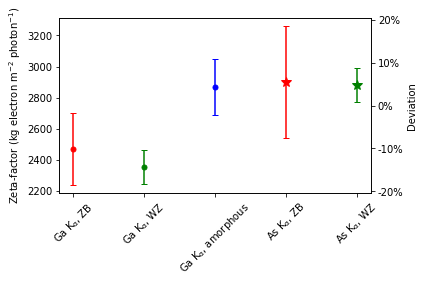

In [12]:
a.plot_zeta_factors(indices=indices)

Find the desired zeta-factors

In [13]:
# Chooze which X-ray lines and region to find zeta-factors from
ts_Ga = uts.ts_merge(a.tilt_series, xray_lines=['Ga_Ka'], regions=['A', 'C'], indices=indices)
ts_As = uts.ts_merge(a.tilt_series, xray_lines=['As_Ka'], regions=['A', 'C'], indices=indices)

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2593fb335c0>)

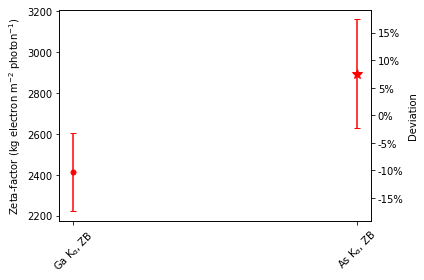

In [14]:
# Plot the results
uts.plot_zeta_factors(uts.get_zeta_factors(ts_Ga)+uts.get_zeta_factors(ts_As))

## Analyze beam current

Plot the beam current along with interpolated beam currents

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2593fc2cf28>)

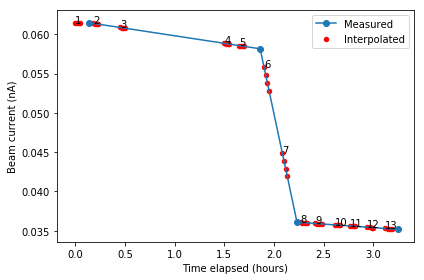

In [15]:
# All methods which are available in BeamCurrentAnalyzer are available here as well.
# The red spots are the individual EDX spectra, whose beam current has been interpolated from the measurements
a.plot_beam_current(interpolated=True, label=True, ref_dec=1)